In [110]:
import cv2
import matplotlib.pyplot as plt
from keras.models import model_from_json
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

In [111]:
X = joblib.load('train_features_joblib')
Y = joblib.load('train_labels_joblib')
X_train,X_test,Y_train,Y_Test = train_test_split(X,Y,test_size = 0.1)

In [112]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

In [113]:
def prepare(image):
    IMG_SIZE = 500
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    plt.imshow(image,cmap = 'gray')
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [114]:
Categories = ['Defective','Non Defective']

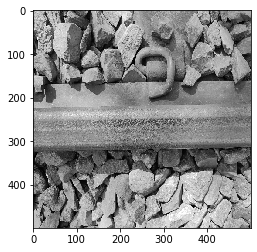

Non Defective


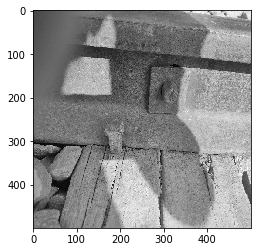

Non Defective


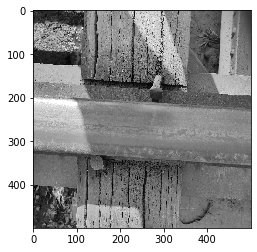

Non Defective


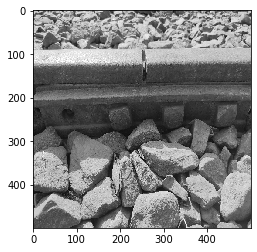

Defective


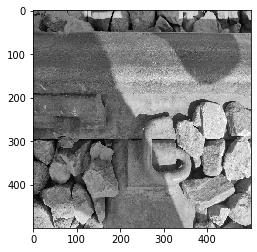

Non Defective


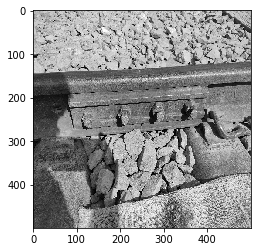

Non Defective


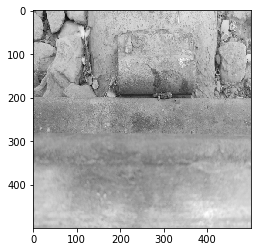

Non Defective


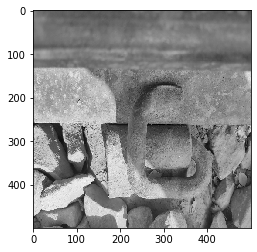

Non Defective


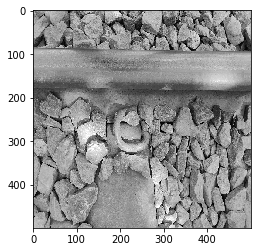

Non Defective


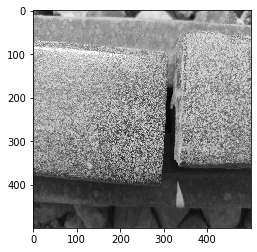

Defective


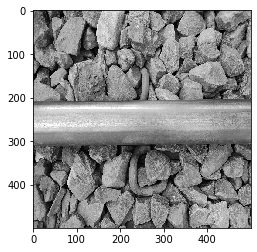

Non Defective


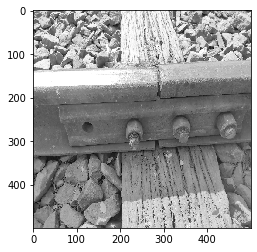

Non Defective


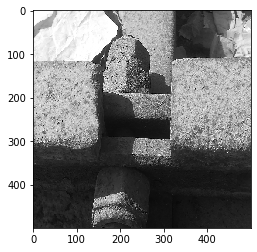

Defective


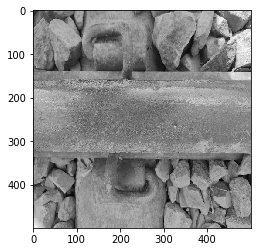

Non Defective


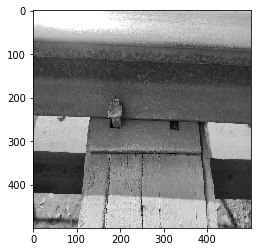

Non Defective


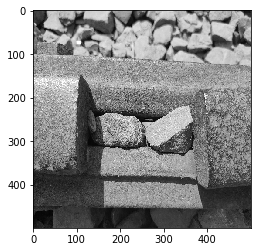

Defective


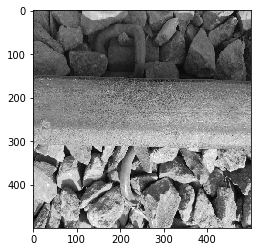

Non Defective


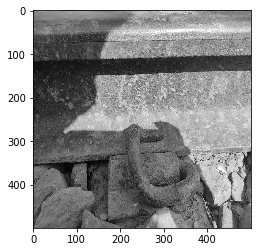

Non Defective


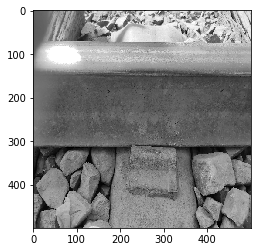

Non Defective


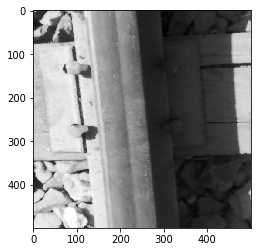

Non Defective


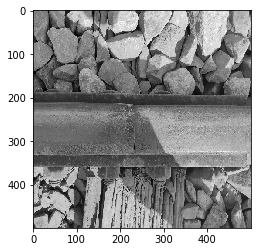

Non Defective


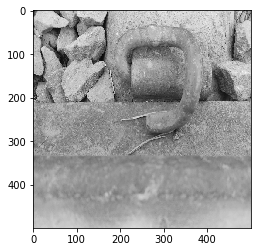

Non Defective


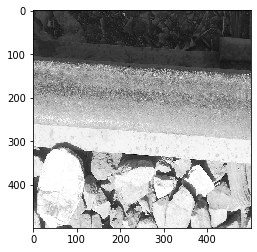

Defective


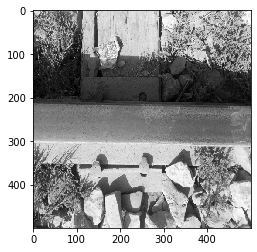

Non Defective


In [115]:
import numpy as np
for i in range(len(X_test)):
    prediction = loaded_model.predict([prepare(np.reshape(X_test[i],(500,500)))])
    print(Categories[int(prediction)])